In [5]:
from utils.dataset import TSProcessor, TSDataset

processor = TSProcessor()

dataset = TSDataset(
    data_path='data/',
    mode='validation',
    history_len=256,
    target_len=32,
    processor=processor,
)

Found 56463 samples for validation mode


In [27]:
from models.model_wrapper import TSModel

# model = TSModel.from_pretrained('pretrained-models/CNNFeatureExtractor', device='mps')
model = TSModel.from_pretrained('pretrained-models/LSTMWithAttention', device='mps')

Модель LSTMWithAttention успешно загружена из pretrained-models/LSTMWithAttention


In [28]:
sum([p.numel() for p in model.parameters()])

17328132

tensor([[0.9135, 1.3299, 0.7592]])


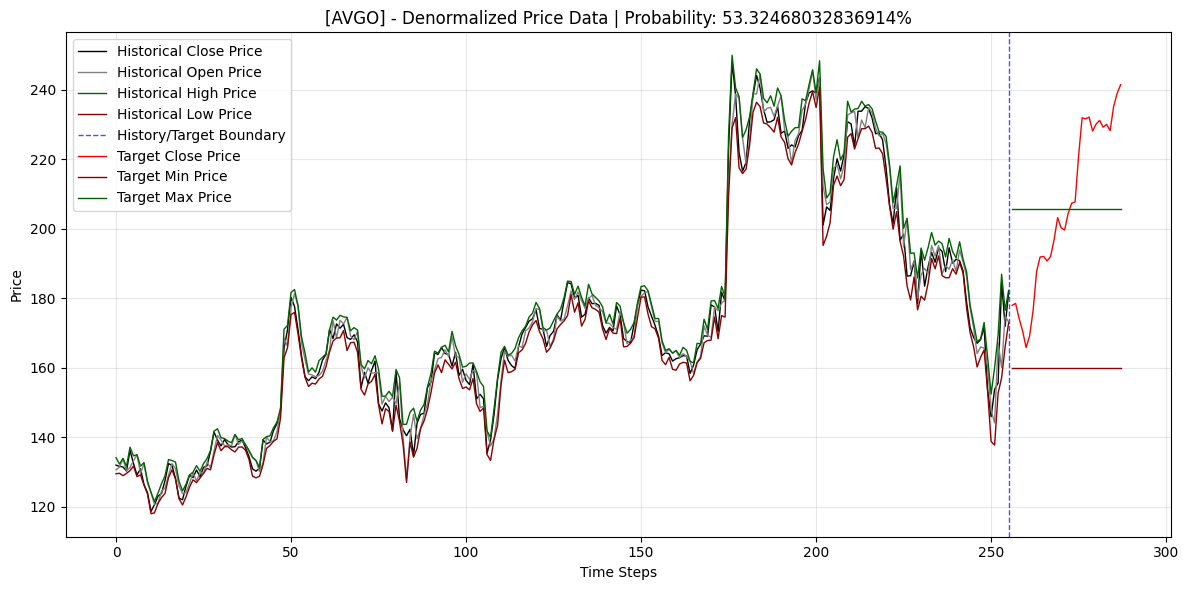

In [46]:
import torch
from utils.visualization import plot_denormalized_sample

sample = dataset[torch.randint(0, len(dataset), (1,)).item()]
history = sample['history'].to(model.device)
pred_scores = model(history)
print(sample['scores'])

plot_denormalized_sample(sample, pred_scores)
# plot_denormalized_sample(sample, sample['scores'])